In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
from mpl_toolkits.basemap import Basemap

In [2]:
def get_points():
    points = []
    with open('Volcanoes_of_the_World.csv') as vulcanos:
        for line in vulcanos:
            array_line = line.split(',')
            point = array_line[7], array_line[8].replace("\r\n", ""), array_line[4]
            points.append(point)
    return points

In [3]:
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    parallels = np.arange(-81,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')
        
    points = get_points()
    
    for point in points[1:]:
        
        #x = round(293.4662543, 2)
        
        xpt, ypt = m(round(float(point[0]),4), round(float(point[1]),4))
        lonpt, latpt = m(xpt,ypt,inverse=True)
        x,y=m(xpt,ypt)
        
        colr = ''
        
        if 'Solfatara' in point[2]:
            colr = 'blue'
        
        if 'Active' == point[2]:
            colr = 'red'
        
        if 'Potentially' in point[2]:
            colr = 'orange'
        
        m.scatter(x,y,marker='.',color=colr)
        

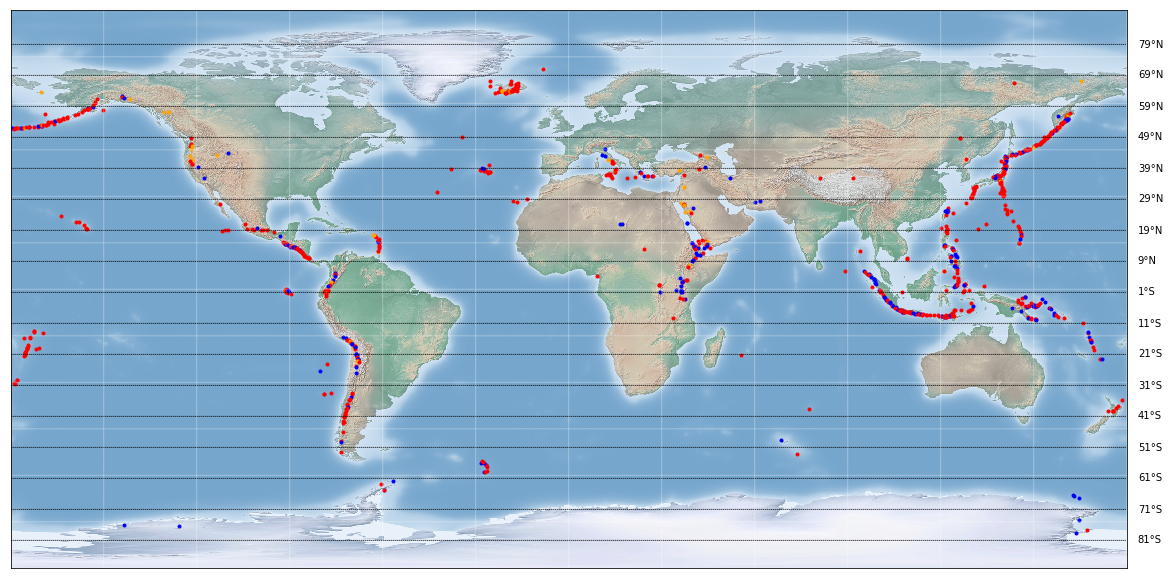

In [5]:
fig = plt.figure(figsize=(20, 16), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,)
draw_map(m)